In [38]:
#Import Libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

from pylab import rcParams
""" Each time Matplotlib loads, it defines a runtime configuration (rc) containing the default styles for every plot element you create. This configuration can be adjusted at any time using the plt."""
import statsmodels.api as sm

In [5]:
os.getcwd()

'C:\\Users\\Chief\\Documents\\Praxis\\TF\\Complete TF'

#### Data being used:
    - Google Stocks Data
    - Humidity in Different world cities
    - Microsoft Stocks Data
    - Pressure in different world cities

In [6]:
google = pd.read_csv("./GOOGL_2006-01-01_to_2018-01-01.csv",
                    index_col = 'Date', #Make date as index column
                    parse_dates = ['Date']) #Imported Date as DateTime
google.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,211.47,218.05,209.32,217.83,13137450,GOOGL
2006-01-04,222.17,224.70,220.09,222.84,15292353,GOOGL
2006-01-05,223.22,226.00,220.97,225.85,10815661,GOOGL
2006-01-06,228.66,235.49,226.85,233.06,17759521,GOOGL
2006-01-09,233.44,236.94,230.70,233.68,12795837,GOOGL


In [7]:
humidity = pd.read_csv('./humidity.csv', 
                      index_col= 'datetime',
                      parse_dates= ['datetime'])

In [8]:
humidity.tail()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2017-11-29 20:00:00,NaN,81.0,NaN,93.0,24.0,72.0,18.0,68.0,37.0,18.0,...,27.0,NaN,64.0,37.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-29 21:00:00,NaN,71.0,NaN,87.0,21.0,72.0,18.0,73.0,34.0,12.0,...,29.0,NaN,59.0,74.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-29 22:00:00,NaN,71.0,NaN,93.0,23.0,68.0,17.0,60.0,32.0,15.0,...,31.0,NaN,66.0,74.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-29 23:00:00,NaN,71.0,NaN,87.0,14.0,63.0,17.0,33.0,30.0,28.0,...,26.0,NaN,58.0,56.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-11-30 00:00:00,NaN,76.0,NaN,75.0,56.0,72.0,17.0,23.0,34.0,31.0,...,32.0,NaN,58.0,56.0,NaN,NaN,NaN,NaN,NaN,NaN


### Cleaning and Preparing Data

#### Null Values

In [9]:
print(google.isnull().sum())
print(humidity.isnull().sum())

Open      0
High      0
Low       0
Close     0
Volume    0
Name      0
dtype: int64
Vancouver            1826
Portland              449
San Francisco         942
Seattle               289
Los Angeles           152
San Diego             344
Las Vegas             842
Phoenix              1308
Albuquerque           710
Denver               1808
San Antonio           564
Dallas                319
Houston               121
Kansas City           512
Minneapolis           510
Saint Louis          1289
Chicago              1109
Nashville             567
Indianapolis          695
Atlanta               422
Detroit               862
Jacksonville          209
Charlotte             589
Miami                1087
Pittsburgh            522
Toronto               728
Philadelphia          624
New York             1624
Montreal             1696
Boston                449
Beersheba             859
Tel Aviv District    1113
Eilat                 970
Haifa                 818
Nahariyya             817
Jerus

In [10]:
humidity = humidity.iloc[1:]
humidity = humidity.fillna(method = 'ffill') # Fills the next data with the previous data
humidity.isnull().sum()

Vancouver            0
Portland             0
San Francisco        0
Seattle              0
Los Angeles          0
San Diego            0
Las Vegas            0
Phoenix              0
Albuquerque          0
Denver               0
San Antonio          0
Dallas               0
Houston              0
Kansas City          0
Minneapolis          0
Saint Louis          0
Chicago              0
Nashville            0
Indianapolis         0
Atlanta              0
Detroit              0
Jacksonville         0
Charlotte            0
Miami                0
Pittsburgh           0
Toronto              0
Philadelphia         0
New York             0
Montreal             0
Boston               0
Beersheba            0
Tel Aviv District    0
Eilat                0
Haifa                0
Nahariyya            0
Jerusalem            0
dtype: int64

### Visualizing the datasets

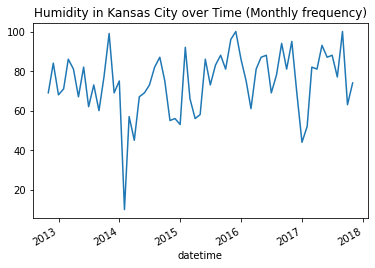

In [11]:
humidity['Kansas City'].asfreq('M').plot() # asfreq method is used to convert a time series to a specified frequency. Here it is montly frequency
plt.title("Humidity in Kansas City over Time (Monthly frequency)")
plt.show()

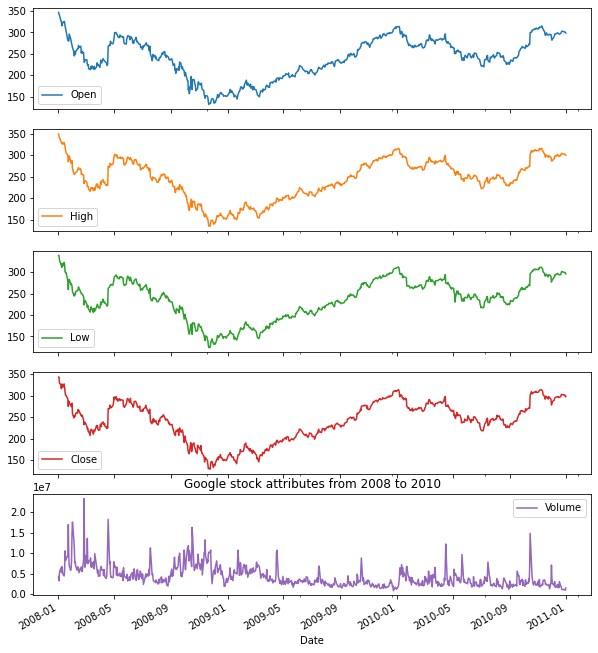

In [12]:
google['2008':'2010'].plot(subplots = True,figsize = (10,12))
plt.title('Google stock attributes from 2008 to 2010')
#plt.savefig('stocks.png')
plt.show()

### Timestamps and Periods

- Timestamps: Timestamps are used to represent a point in time
- Periods: Periods represent an interval in time. Periods can be used to check if a specific event in the given period.
- They can also be converted to each other's form.

In [13]:
#Creating a Timestamp
timestamp = pd.Timestamp(2017,1,1,12)
timestamp


Timestamp('2017-01-01 12:00:00')

In [14]:
# Creating a period
period = pd.Period('2017-01-01')
period

Period('2017-01-01', 'D')

In [15]:
period.end_time

Timestamp('2017-01-01 23:59:59.999999999')

In [16]:
# Checking if a given timetamp exists in the given period
period.start_time < timestamp < period.end_time

True

In [43]:
# Converting timestamp to period
new_period = timestamp.to_period(freq = 'H')
print(new_period)
print(new_period.start_time)
print(new_period.end_time)

2017-01-01 12:00
2017-01-01 12:00:00
2017-01-01 12:59:59.999999999


In [33]:
# Converting period to timestamp
new_timestamp = period.to_timestamp(freq = 'H', how = 'end')
new_timestamp

Timestamp('2017-01-01 23:59:59.999999999')

### Using date_range

<b>date_range</b> is a method that returns a fixed frequency datetimeindex. It is quite useful when creating your own time series attribute for pre-existing data or arranging the whole data around the time series attribute created by you.

In [48]:
# Creating a datetimeindex with daily frequency
dr1 = pd.date_range(start ='1/1/18', end = '1/9/18') #M/D/Y
dr1

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09'],
              dtype='datetime64[ns]', freq='D')

In [50]:
# Creating a datetimeindex with monthly frequency
dr2 = pd.date_range(start = '1/1/18', end = '1/1/19', freq = 'M')
dr2

DatetimeIndex(['2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
               '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31'],
              dtype='datetime64[ns]', freq='M')

In [52]:
# Creating a datetimeindex without specifying the start date and using periods
dr3 = pd.date_range(end  = '1/4/2014', periods = 8)
dr3

DatetimeIndex(['2013-12-28', '2013-12-29', '2013-12-30', '2013-12-31',
               '2014-01-01', '2014-01-02', '2014-01-03', '2014-01-04'],
              dtype='datetime64[ns]', freq='D')

In [53]:
# Creating a datetimeindex specifying start date, end date and periods
dr4 = pd.date_range(start = '24/04/2013', end = '27/12/2014', periods = 3)
dr4

DatetimeIndex(['2013-04-24', '2014-02-24', '2014-12-27'], dtype='datetime64[ns]', freq=None)

### Using to_datetime

pandas.to_datetime() is used for converting arguments to datetime. Here, a DataFrame is converted to a datetime series.

In [55]:
df = pd.DataFrame({'year': [2015, 2016], 'month': [2,3], 'day': [4,5]})
df

,year,month,day
0,2015,2,4
1,2016,3,5


In [58]:
df = pd.to_datetime(df)
df

0   2015-02-04
1   2016-03-05
dtype: datetime64[ns]

In [59]:
df = pd.to_datetime('01/01/2017')
df

Timestamp('2017-01-01 00:00:00')

### Shifting and lags

We can shift index by desired number of periods with an optional time frequency. This is useful when comparing the time series with a past of itself.
<b>shift = lag</b>

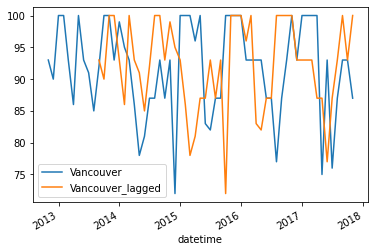

In [64]:
humidity['Vancouver'].asfreq('M').plot(legend = True)
shifted = humidity['Vancouver'].asfreq('M').shift(10).plot(legend = True)
shifted.legend(['Vancouver', 'Vancouver_lagged'])
plt.show()

### Resampling

<b>Upsampling</b> - Time series is resampled from low frequency to high frequency(Monthly to daily frequency). It involves filling or interpolating missing data

<b>Downsampling </b> - Time series is resampled from high frequency to low frequency(Weekly to monthly frequency). It involves aggregation of existing data.

In [17]:
pressure = pd.read_csv('./pressure.csv', 
                      index_col= 'datetime', parse_dates= ['datetime'])
pressure.head()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1011.0,NaN,NaN,NaN
2012-10-01 13:00:00,NaN,1024.0,1009.0,1027.0,1013.0,1013.0,1018.0,1013.0,1024.0,1028.0,...,1014.0,1012.0,1001.0,1014.0,984.0,1012.0,1010.0,1013.0,1013.0,990.0
2012-10-01 14:00:00,NaN,1024.0,1009.0,1027.0,1013.0,1013.0,1018.0,1013.0,1024.0,1028.0,...,1014.0,1012.0,986.0,1014.0,984.0,1012.0,1010.0,1013.0,1013.0,990.0
2012-10-01 15:00:00,NaN,1024.0,1009.0,1028.0,1013.0,1013.0,1018.0,1013.0,1024.0,1028.0,...,1014.0,1012.0,945.0,1014.0,984.0,1012.0,1010.0,1013.0,1013.0,990.0
2012-10-01 16:00:00,NaN,1024.0,1009.0,1028.0,1013.0,1013.0,1018.0,1013.0,1024.0,1028.0,...,1014.0,1012.0,904.0,1014.0,984.0,1012.0,1010.0,1013.0,1013.0,990.0


In [18]:
pressure = pressure.iloc[1:]
pressure = pressure.fillna(method = 'ffill') #we used ffill parameter which propagates last valid observation to fill gaps
pressure.tail()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2017-11-29 20:00:00,1021.0,1031.0,1013.0,1030.0,1016.0,1017.0,1021.0,1018.0,1025.0,1016.0,...,1021.0,1020.0,1021.0,1017.0,984.0,1011.0,968.0,1023.0,1023.0,1011.0
2017-11-29 21:00:00,1021.0,1030.0,1013.0,1030.0,1016.0,1017.0,1020.0,1018.0,1024.0,1018.0,...,1021.0,1020.0,1023.0,1019.0,984.0,1011.0,968.0,1023.0,1023.0,1011.0
2017-11-29 22:00:00,1021.0,1030.0,1013.0,1029.0,1015.0,1016.0,1020.0,1017.0,1024.0,1018.0,...,1022.0,1020.0,1024.0,1019.0,984.0,1011.0,968.0,1023.0,1023.0,1011.0
2017-11-29 23:00:00,1021.0,1029.0,1013.0,1028.0,1016.0,1016.0,1020.0,1016.0,1024.0,1020.0,...,1023.0,1020.0,1026.0,1022.0,984.0,1011.0,968.0,1023.0,1023.0,1011.0
2017-11-30 00:00:00,1021.0,1029.0,1013.0,1028.0,1015.0,1017.0,1019.0,1016.0,1024.0,1021.0,...,1024.0,1020.0,1027.0,1023.0,984.0,1011.0,968.0,1023.0,1023.0,1011.0


In [72]:
pressure.isnull().sum()

Vancouver            19
Portland              0
San Francisco         0
Seattle               0
Los Angeles           0
San Diego             0
Las Vegas             0
Phoenix               0
Albuquerque           0
Denver                0
San Antonio           0
Dallas                0
Houston               0
Kansas City           0
Minneapolis           0
Saint Louis           0
Chicago               0
Nashville             0
Indianapolis          0
Atlanta               0
Detroit               0
Jacksonville          0
Charlotte             0
Miami                 0
Pittsburgh            0
Toronto               0
Philadelphia          0
New York              0
Montreal              0
Boston                0
Beersheba             0
Tel Aviv District     0
Eilat                 0
Haifa                 0
Nahariyya             0
Jerusalem             0
dtype: int64

In [74]:
pressure = pressure.fillna(method = 'bfill') # we use bfill to propogate next valid observation to fill gaps.
pressure.head()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-01 14:00:00,807.0,1024.0,1009.0,1027.0,1013.0,1013.0,1018.0,1013.0,1024.0,1028.0,...,1014.0,1012.0,986.0,1014.0,984.0,1012.0,1010.0,1013.0,1013.0,990.0
2012-10-01 15:00:00,807.0,1024.0,1009.0,1028.0,1013.0,1013.0,1018.0,1013.0,1024.0,1028.0,...,1014.0,1012.0,945.0,1014.0,984.0,1012.0,1010.0,1013.0,1013.0,990.0
2012-10-01 16:00:00,807.0,1024.0,1009.0,1028.0,1013.0,1013.0,1018.0,1013.0,1024.0,1028.0,...,1014.0,1012.0,904.0,1014.0,984.0,1012.0,1010.0,1013.0,1013.0,990.0
2012-10-01 17:00:00,807.0,1024.0,1009.0,1029.0,1013.0,1013.0,1018.0,1013.0,1024.0,1028.0,...,1014.0,1012.0,863.0,1014.0,984.0,1012.0,1010.0,1013.0,1013.0,990.0
2012-10-01 18:00:00,807.0,1024.0,1010.0,1030.0,1013.0,1013.0,1018.0,1013.0,1024.0,1028.0,...,1014.0,1012.0,822.0,1014.0,984.0,1012.0,1010.0,1013.0,1013.0,990.0


In [76]:
pressure.shape

(45251, 36)

In [77]:
# We downsample from hourly to 3 day frequency aggregated using mean

pressure = pressure.resample('3D').mean()
pressure.head()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-01,933.775862,1022.620690,1010.913793,1031.344828,1011.603448,1011.948276,1016.293103,1012.068966,1022.517241,1024.051724,...,1014.155172,1013.448276,936.534483,1013.672414,985.068966,1012.965517,1011.827586,1013.000000,1013.000000,990.534483
2012-10-04,1019.083333,1023.041667,1014.694444,1028.305556,1015.555556,1016.277778,1013.194444,1014.097222,1019.972222,1020.666667,...,1018.097222,1017.680556,1017.180556,1019.805556,984.930556,1013.083333,1012.611111,1013.000000,1013.000000,990.083333
2012-10-07,1013.930556,1017.444444,1016.597222,1018.736111,1013.416667,1014.222222,1012.888889,1011.861111,1005.833333,1020.458333,...,1017.958333,1016.750000,1014.152778,1016.305556,982.972222,1013.027778,1007.555556,1013.000000,1013.000000,989.833333
2012-10-10,1015.000000,1015.430556,1014.833333,1018.416667,1010.694444,1014.013889,1000.166667,1005.611111,986.000000,984.486111,...,1018.694444,1017.916667,1016.166667,1017.319444,979.763889,1006.527778,998.763889,1012.333333,1012.333333,987.888889
2012-10-13,1008.152778,1018.111111,1021.069444,1015.930556,1017.277778,1018.375000,1015.666667,1015.500000,1013.625000,1010.444444,...,1025.055556,1024.388889,1020.805556,1023.736111,984.527778,1013.027778,1007.194444,1013.000000,1013.000000,990.430556


In [78]:
pressure.shape

(629, 36)

In [79]:
# Much less rows are left. Now we will upsample from 3 day frequency to daily frequency
pressure = pressure.resample('D').pad()
pressure.head()

,Vancouver,Portland,San Francisco,Seattle,Los Angeles,San Diego,Las Vegas,Phoenix,Albuquerque,Denver,...,Philadelphia,New York,Montreal,Boston,Beersheba,Tel Aviv District,Eilat,Haifa,Nahariyya,Jerusalem
datetime,,,,,,,,,,,,,,,,,,,,,
2012-10-01,933.775862,1022.620690,1010.913793,1031.344828,1011.603448,1011.948276,1016.293103,1012.068966,1022.517241,1024.051724,...,1014.155172,1013.448276,936.534483,1013.672414,985.068966,1012.965517,1011.827586,1013.0,1013.0,990.534483
2012-10-02,933.775862,1022.620690,1010.913793,1031.344828,1011.603448,1011.948276,1016.293103,1012.068966,1022.517241,1024.051724,...,1014.155172,1013.448276,936.534483,1013.672414,985.068966,1012.965517,1011.827586,1013.0,1013.0,990.534483
2012-10-03,933.775862,1022.620690,1010.913793,1031.344828,1011.603448,1011.948276,1016.293103,1012.068966,1022.517241,1024.051724,...,1014.155172,1013.448276,936.534483,1013.672414,985.068966,1012.965517,1011.827586,1013.0,1013.0,990.534483
2012-10-04,1019.083333,1023.041667,1014.694444,1028.305556,1015.555556,1016.277778,1013.194444,1014.097222,1019.972222,1020.666667,...,1018.097222,1017.680556,1017.180556,1019.805556,984.930556,1013.083333,1012.611111,1013.0,1013.0,990.083333
2012-10-05,1019.083333,1023.041667,1014.694444,1028.305556,1015.555556,1016.277778,1013.194444,1014.097222,1019.972222,1020.666667,...,1018.097222,1017.680556,1017.180556,1019.805556,984.930556,1013.083333,1012.611111,1013.0,1013.0,990.083333


In [81]:
pressure.shape

(1885, 36)

### Finance and Statistics

#### Percent change

<AxesSubplot:xlabel='Date'>

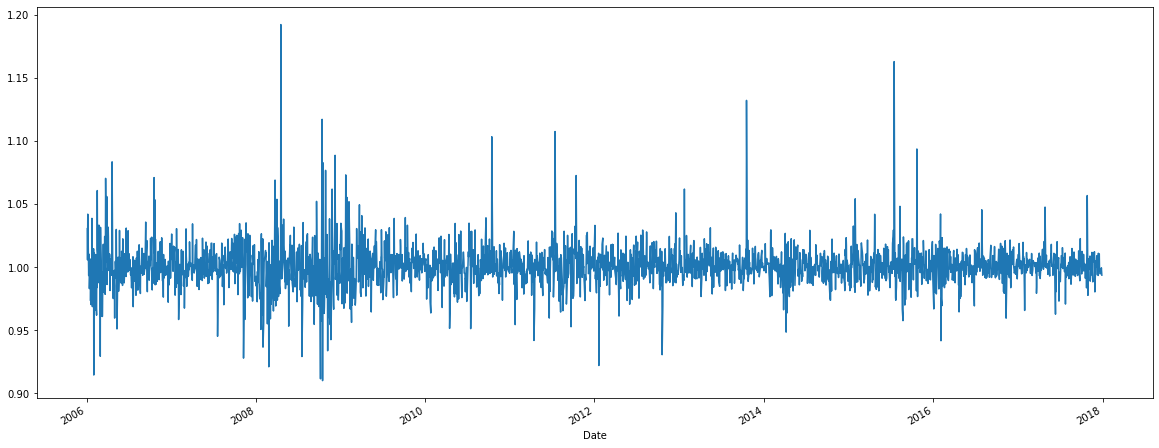

In [93]:
google['Change'] = google.High.div(google.High.shift()) # ?

google['Change'].plot(figsize = (20,8))

#### Absolute change in successive rows

<AxesSubplot:xlabel='Date'>

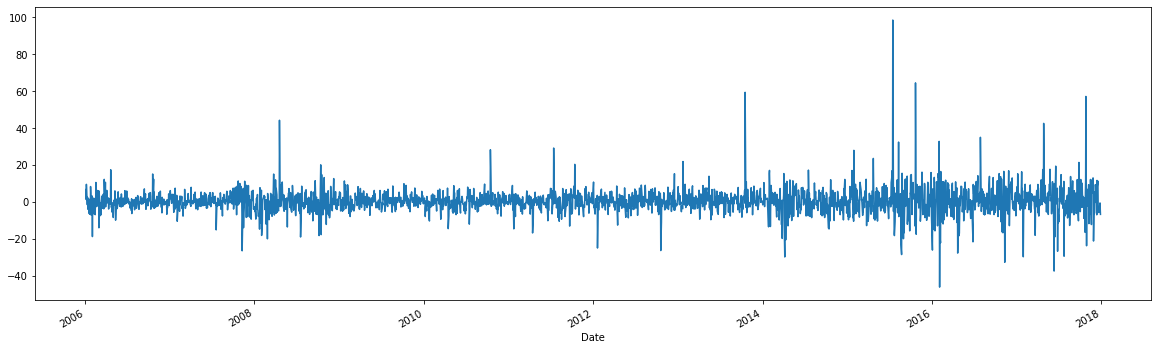

In [96]:
google.High.diff().plot(figsize = (20,6))

### Comparing two or more time series

We will compare 2 time series by normalizing them. This is achieved by dividing each time series element of all time series by the first element. This way both series start at the same point and can be easily compared. <b> But why just the first element</b>

In [19]:
# Comparing Microsoft stocks with google

microsoft = pd.read_csv('./MSFT_2006-01-01_to_2018-01-01.csv',
                       index_col = 'Date', parse_dates = ['Date'])

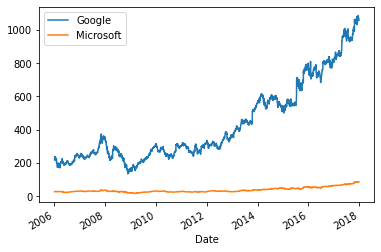

In [21]:
# Plotting before normalization
google.High.plot()
microsoft.High.plot()
plt.legend(['Google', 'Microsoft'])
plt.show()

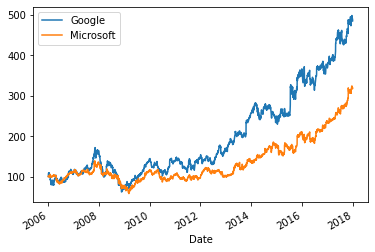

In [22]:
# Normalizing and comparison
# Both stocks start from 100


# .mul -> Get Multiplication of dataframe and other, element-wise (binary operator mul).
# .div -> Divide Dataframe element wise

normalized_google = google.High.div(google.High.iloc[0]).mul(100)
normalized_microsoft = microsoft.High.div(microsoft.High.iloc[0]).mul(100)

normalized_google.plot()
normalized_microsoft.plot()
plt.legend(['Google', 'Microsoft'])
plt.show()

You can clearly see how google outperforms microsoft over time.

### Rolling Average

#### Window Function

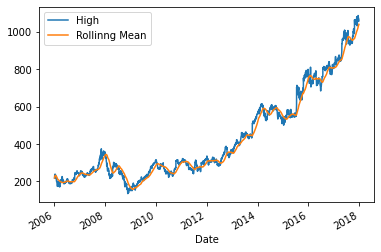

In [24]:
# Rolling Window Function

rolling_google = google.High.rolling('90D').mean()
google.High.plot()
rolling_google.plot()
plt.legend(['High', 'Rollinng Mean'])
plt.show()

We can observe that rolling mean plot is a smoother version of the original plot

## Autocorrelation and Partial Autocorrelation

- <b>Autocorrelation</b> - The autocorrelation function (ACF) measures how a seires is correlated with itself at different lags

- <b>Partial Autocorrelation</b> - The partial autocorrelation function can be interpreted as a regression of the series against its past lags. The terms can be interpreted the same way as a standard linear regression, that is the contribution of a change in that particular lag while holding others constant.

### Autocorrelation

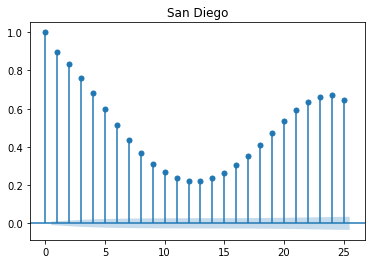

In [29]:
# Autocorrelation of humidity of San Diego

plot_acf(humidity['San Diego'], lags = 25, title = 'San Diego') #Plot_acf plots lag
plt.show()

As all lags are either close to 1 or at least greater than the confidence interval, they are statistically significant.

### Partial Autocorrelation

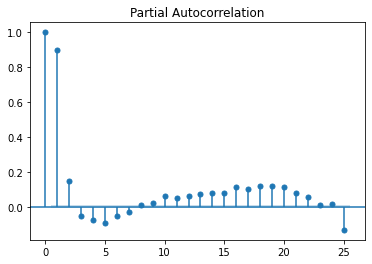

In [30]:
# partial Autocorrelation of humidity of San Diego
plot_pacf(humidity['San Diego'], lags = 25)
plt.show()

Though it is statistically significant, partial autocorrelation after first 2 lags is very low

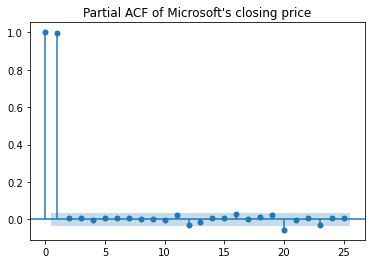

In [31]:
# Partial Autocorrelation of closing price of Microsoft stocks

plot_pacf(microsoft['Close'], lags = 25, title = "Partial ACF of Microsoft's closing price")
plt.show()

Only the oth, 1st and 20th lags are statistically significant

## Time Series Decomposition

### Trends, Seasonality and Noise

These are the components of a time series
- Trend - Consistent upwards or downwards slope of a time series
- Seasonality - Clear periodic pattern of a time series
- Noise - Outliers or missing Values

<AxesSubplot:xlabel='Date'>

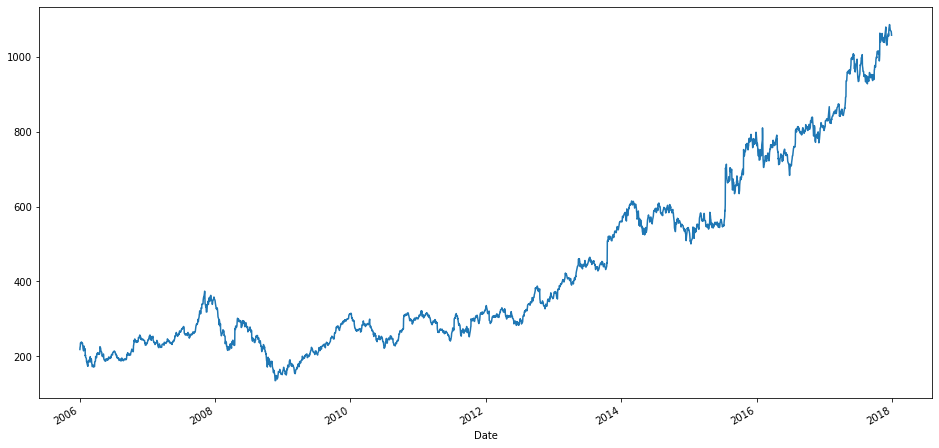

In [32]:
# Let's take Google stocks High for this

google.High.plot(figsize = (16,8))

[]

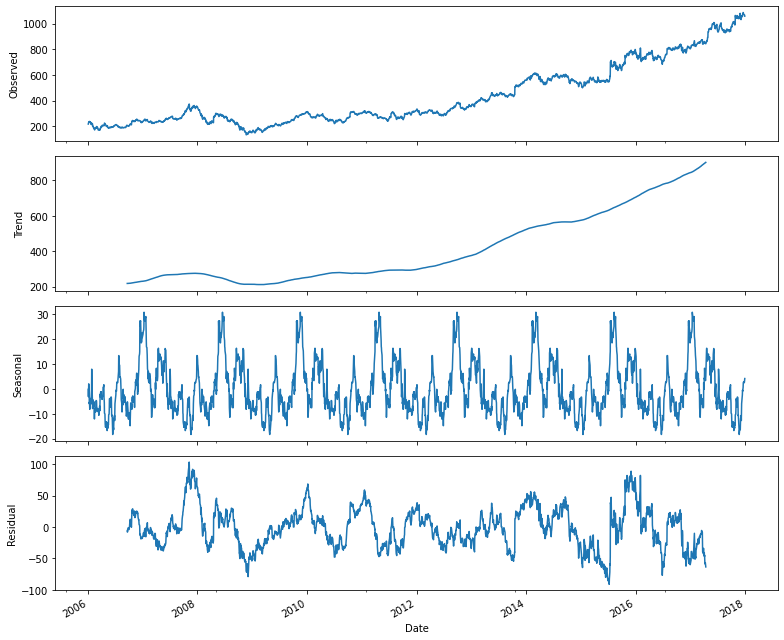

In [39]:
# Now for decomposition
rcParams['figure.figsize'] = 11, 9
decomposed_google_volume = sm.tsa.seasonal_decompose(google['High'], freq = 360) # The frequency is annual
figure = decomposed_google_volume.plot()
plt.plot()

- There is clearly an upward trend in the above plot
- You can also see the uniform seasonal change
- Non-uniform noise that represent outliers and missing values

### White Noise

White noise has:
    - Constant mean
    - Constant Variance
    - Zero auto-correlation at all lags